In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")
df = df.drop(["Serial No."], axis = 1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
train = df.iloc[:400, :]
test = df.iloc[400:, :-1]
val = df.iloc[400:, -1]

print(df.shape)
print(train.shape)
print(test.shape)

(500, 8)
(400, 8)
(100, 7)


In [4]:
train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
X = train.drop("Chance of Admit ", 1)
y = train["Chance of Admit "]

In [7]:
from sklearn.model_selection import cross_validate, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
X = pd.DataFrame(scaler.fit_transform(X), columns=train.drop(["Chance of Admit "], 1).columns)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
predict = lr.predict(X_test)

In [18]:
lr_coef = pd.DataFrame({'columns':X.columns, 'coef':pd.Series(lr.coef_)})

In [22]:
lr_coef

,columns,coef
0,GRE Score,0.002002
1,TOEFL Score,0.002877
2,University Rating,0.005547
3,SOP,0.000641
4,LOR,0.015131
5,CGPA,0.116301
6,Research,0.016031


In [23]:
lr_coef.sort_values(ascending=False, by='coef')

,columns,coef
5,CGPA,0.116301
6,Research,0.016031
4,LOR,0.015131
2,University Rating,0.005547
1,TOEFL Score,0.002877
0,GRE Score,0.002002
3,SOP,0.000641


In [24]:
#importing extra tree classifier and then initializing it

from sklearn.ensemble import ExtraTreesRegressor
tree = ExtraTreesRegressor(random_state =1)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

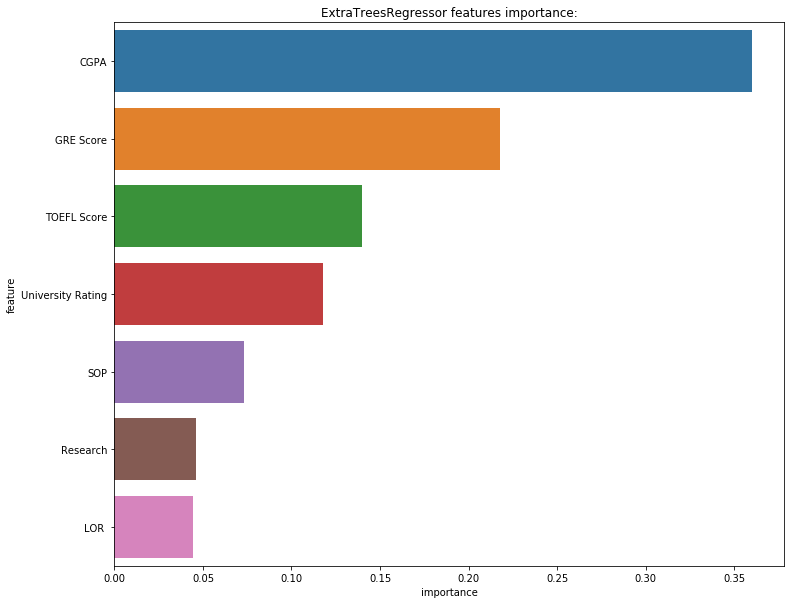

In [30]:
feature_importance_df = pd.DataFrame(tree.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(12, 10));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(9))
plt.title('ExtraTreesRegressor features importance:');

In [25]:
# importing lightgbm Regressor
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(random_state=1)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

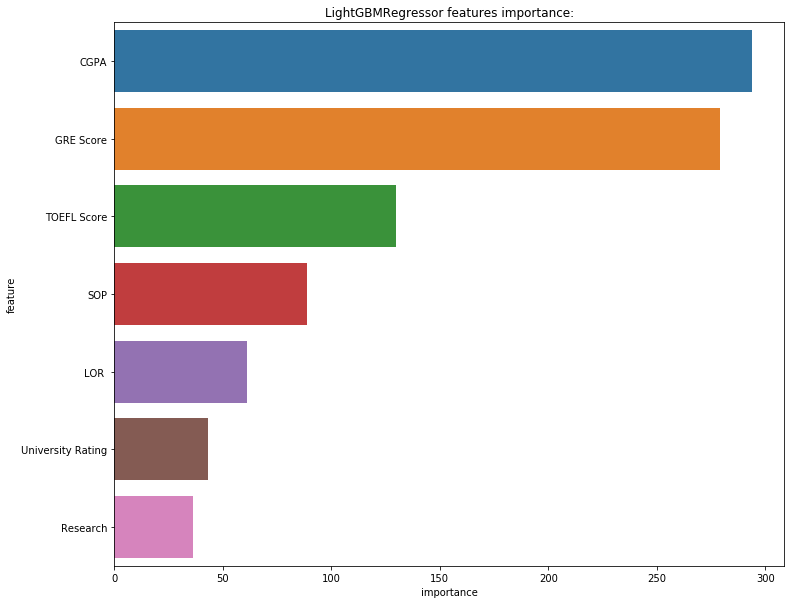

In [28]:
feature_importance_df = pd.DataFrame(lgbm.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(12, 10));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(9))
plt.title('LightGBMRegressor features importance:');

In [32]:
# importing xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=1)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

[22:33:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


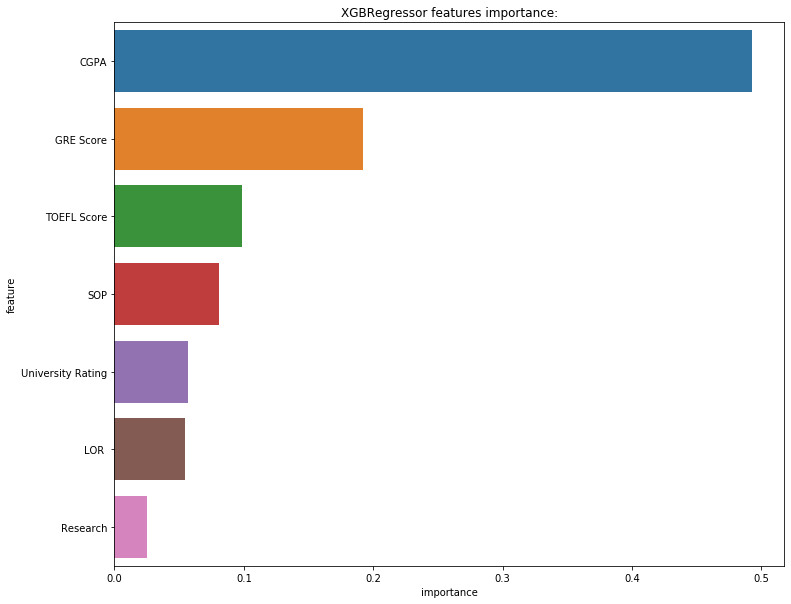

In [33]:
feature_importance_df = pd.DataFrame(xgb.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(12, 10));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(9))
plt.title('XGBRegressor features importance:');

In [34]:
#importing RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

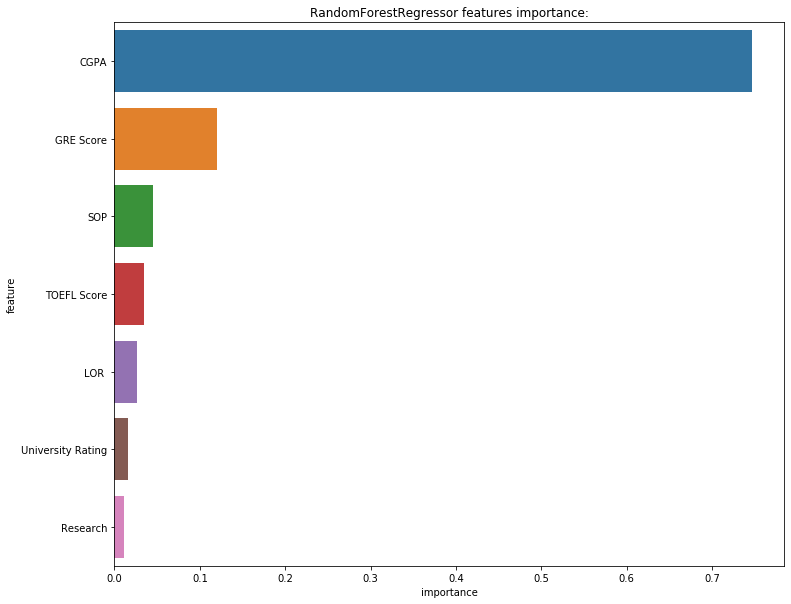

In [35]:
feature_importance_df = pd.DataFrame(rf.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(12, 10));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(9))
plt.title('RandomForestRegressor features importance:');

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
rmse_lr = np.sqrt(mean_squared_error(y_test, predict))
rmse_tree = np.sqrt(mean_squared_error(y_test, tree_pred))
rmse_lgbm = np.sqrt(mean_squared_error(y_test,lgbm_pred))
rmse_xgb = np.sqrt(mean_squared_error(y_test,xgb_pred))
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))

In [16]:
print("The RMSE for linear regression model is : ", rmse_lr)
print("The RMSE for extra tree regression model is : ", rmse_tree) 
print("The RMSE for lightgbm Regressor model is : ", rmse_lgbm)
print("The RMSE for XGBoost Regressor model is : ", rmse_xgb)
print("The RMSE for Random Forest Regressor model is : ", rmse_rf)

The RMSE for linear regression model is :  0.06614861795772532
The RMSE for extra tree regression model is :  0.07016058204381768
The RMSE for lightgbm Regressor model is :  0.07183932053866045
The RMSE for XGBoost Regressor model is :  0.0745797543546979
The RMSE for Random Forest Regressor model is :  0.07038552171197332


In [17]:
# importing Ridge model

from sklearn.linear_model import Ridge
ridge = Ridge()

# hyperparameter tuning to find the best alpha value for ridge

from sklearn.model_selection import GridSearchCV
parameters = {"alpha" : [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,8,10,20] }
ridge_reg = GridSearchCV(ridge, parameters, scoring='r2', cv = 5)

ridge_reg.fit(X_train, y_train)

ridge_reg_pred = ridge_reg.predict(X_test)

#check for the best parameters
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 1e-15}
0.7781689760381411


In [38]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [41]:
# Using the new value for alpha
ridge_hype=Ridge(alpha=1e-15)
ridge_hype.fit(X_train, y_train)
ridge_hype_pred=ridge_hype.predict(X_test)

In [42]:
ridge_coef = pd.DataFrame({'columns':X.columns, 'coef':pd.Series(ridge_hype.coef_)})

In [43]:
ridge_coef.sort_values(ascending=False, by='coef')

,columns,coef
5,CGPA,0.116301
6,Research,0.016031
4,LOR,0.015131
2,University Rating,0.005547
1,TOEFL Score,0.002877
0,GRE Score,0.002002
3,SOP,0.000641


In [19]:
# importing LAsso model

from sklearn.linear_model import Lasso
lasso = Lasso()

# hyperparameter tuning to find the best alpha value for lasso
parameters = {"alpha" : [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,8,10,20] }
lasso_reg = GridSearchCV(lasso, parameters, scoring='r2', cv = 5)

lasso_reg.fit(X_train, y_train)

lasso_reg_pred = lasso_reg.predict(X_test)

#check for the best parameters
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 0.001}
0.7786825196720665


In [44]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [45]:
# Using the best value for lasso

lasso_hype=Lasso(alpha=0.001)
lasso_hype.fit(X_train, y_train)
lasso_hype_pred=lasso_hype.predict(X_test)

In [46]:
lasso_coef = pd.DataFrame({'columns':X.columns, 'coef':pd.Series(lasso_hype.coef_)})

In [47]:
lasso_coef.sort_values(ascending=False, by='coef')

,columns,coef
5,CGPA,0.105726
4,LOR,0.015887
6,Research,0.010366
2,University Rating,0.005548
1,TOEFL Score,0.003250
0,GRE Score,0.002412
3,SOP,0.000411


In [21]:
rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge_reg_pred))
rmse_ridge_hype_pred = np.sqrt(mean_squared_error(y_test, ridge_hype_pred))

rmse_lasso = np.sqrt(mean_squared_error(y_test, lasso_reg_pred))
rmse_lasso_hype_pred = np.sqrt(mean_squared_error(y_test, lasso_hype_pred))


print("The RMSE for ridge model is : ", rmse_ridge)
print("The RMSE for hyped ridge model is : ", rmse_ridge_hype_pred)

print("The RMSE for ridge model is : ", rmse_lasso)
print("The RMSE for hyped lasso model is : ", rmse_lasso_hype_pred)


The RMSE for ridge model is :  0.06614861795772532
The RMSE for hyped ridge model is :  0.06614861795772532
The RMSE for ridge model is :  0.06685033670344473
The RMSE for hyped lasso model is :  0.06685033670344473


In [36]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(random_state=1)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)

Learning rate set to 0.030875
0:	learn: 0.1357330	total: 499ms	remaining: 8m 18s
1:	learn: 0.1330519	total: 502ms	remaining: 4m 10s
2:	learn: 0.1303355	total: 504ms	remaining: 2m 47s
3:	learn: 0.1279881	total: 506ms	remaining: 2m 6s
4:	learn: 0.1257669	total: 508ms	remaining: 1m 41s
5:	learn: 0.1235796	total: 510ms	remaining: 1m 24s
6:	learn: 0.1213261	total: 512ms	remaining: 1m 12s
7:	learn: 0.1191530	total: 514ms	remaining: 1m 3s
8:	learn: 0.1173299	total: 515ms	remaining: 56.7s
9:	learn: 0.1154331	total: 517ms	remaining: 51.2s
10:	learn: 0.1134665	total: 519ms	remaining: 46.7s
11:	learn: 0.1116327	total: 522ms	remaining: 42.9s
12:	learn: 0.1097158	total: 524ms	remaining: 39.8s
13:	learn: 0.1080185	total: 526ms	remaining: 37s
14:	learn: 0.1062214	total: 528ms	remaining: 34.7s
15:	learn: 0.1045047	total: 530ms	remaining: 32.6s
16:	learn: 0.1029678	total: 533ms	remaining: 30.8s
17:	learn: 0.1013070	total: 535ms	remaining: 29.2s
18:	learn: 0.0997454	total: 537ms	remaining: 27.7s
19:	lea

166:	learn: 0.0494831	total: 906ms	remaining: 4.52s
167:	learn: 0.0494089	total: 909ms	remaining: 4.5s
168:	learn: 0.0493588	total: 913ms	remaining: 4.49s
169:	learn: 0.0491873	total: 915ms	remaining: 4.47s
170:	learn: 0.0490732	total: 918ms	remaining: 4.45s
171:	learn: 0.0489413	total: 920ms	remaining: 4.43s
172:	learn: 0.0488781	total: 922ms	remaining: 4.41s
173:	learn: 0.0487643	total: 924ms	remaining: 4.38s
174:	learn: 0.0487325	total: 926ms	remaining: 4.37s
175:	learn: 0.0487244	total: 927ms	remaining: 4.34s
176:	learn: 0.0485955	total: 929ms	remaining: 4.32s
177:	learn: 0.0485529	total: 931ms	remaining: 4.3s
178:	learn: 0.0484943	total: 933ms	remaining: 4.28s
179:	learn: 0.0484103	total: 935ms	remaining: 4.26s
180:	learn: 0.0483314	total: 937ms	remaining: 4.24s
181:	learn: 0.0482339	total: 939ms	remaining: 4.22s
182:	learn: 0.0481934	total: 941ms	remaining: 4.2s
183:	learn: 0.0480703	total: 944ms	remaining: 4.19s
184:	learn: 0.0480111	total: 946ms	remaining: 4.17s
185:	learn: 0.0

369:	learn: 0.0366838	total: 1.32s	remaining: 2.25s
370:	learn: 0.0366463	total: 1.33s	remaining: 2.25s
371:	learn: 0.0365765	total: 1.33s	remaining: 2.24s
372:	learn: 0.0365249	total: 1.33s	remaining: 2.24s
373:	learn: 0.0364348	total: 1.33s	remaining: 2.23s
374:	learn: 0.0364045	total: 1.33s	remaining: 2.23s
375:	learn: 0.0363506	total: 1.34s	remaining: 2.22s
376:	learn: 0.0363073	total: 1.34s	remaining: 2.21s
377:	learn: 0.0362638	total: 1.34s	remaining: 2.21s
378:	learn: 0.0362281	total: 1.34s	remaining: 2.2s
379:	learn: 0.0361553	total: 1.34s	remaining: 2.19s
380:	learn: 0.0361272	total: 1.35s	remaining: 2.19s
381:	learn: 0.0360935	total: 1.35s	remaining: 2.18s
382:	learn: 0.0360256	total: 1.35s	remaining: 2.18s
383:	learn: 0.0359563	total: 1.35s	remaining: 2.17s
384:	learn: 0.0358749	total: 1.36s	remaining: 2.17s
385:	learn: 0.0358061	total: 1.36s	remaining: 2.16s
386:	learn: 0.0358030	total: 1.36s	remaining: 2.15s
387:	learn: 0.0357962	total: 1.36s	remaining: 2.15s
388:	learn: 0

560:	learn: 0.0291961	total: 1.74s	remaining: 1.36s
561:	learn: 0.0291654	total: 1.74s	remaining: 1.35s
562:	learn: 0.0291121	total: 1.74s	remaining: 1.35s
563:	learn: 0.0290543	total: 1.74s	remaining: 1.35s
564:	learn: 0.0290114	total: 1.74s	remaining: 1.34s
565:	learn: 0.0289986	total: 1.75s	remaining: 1.34s
566:	learn: 0.0289618	total: 1.75s	remaining: 1.33s
567:	learn: 0.0289390	total: 1.75s	remaining: 1.33s
568:	learn: 0.0289051	total: 1.75s	remaining: 1.33s
569:	learn: 0.0288404	total: 1.75s	remaining: 1.32s
570:	learn: 0.0287877	total: 1.76s	remaining: 1.32s
571:	learn: 0.0287431	total: 1.76s	remaining: 1.31s
572:	learn: 0.0286824	total: 1.76s	remaining: 1.31s
573:	learn: 0.0286671	total: 1.76s	remaining: 1.31s
574:	learn: 0.0286477	total: 1.76s	remaining: 1.3s
575:	learn: 0.0286445	total: 1.76s	remaining: 1.3s
576:	learn: 0.0285642	total: 1.77s	remaining: 1.3s
577:	learn: 0.0285267	total: 1.77s	remaining: 1.29s
578:	learn: 0.0284752	total: 1.77s	remaining: 1.29s
579:	learn: 0.0

756:	learn: 0.0229498	total: 2.15s	remaining: 691ms
757:	learn: 0.0229412	total: 2.15s	remaining: 688ms
758:	learn: 0.0229398	total: 2.15s	remaining: 685ms
759:	learn: 0.0229340	total: 2.16s	remaining: 681ms
760:	learn: 0.0228930	total: 2.16s	remaining: 678ms
761:	learn: 0.0228804	total: 2.16s	remaining: 675ms
762:	learn: 0.0228461	total: 2.16s	remaining: 672ms
763:	learn: 0.0228448	total: 2.17s	remaining: 669ms
764:	learn: 0.0228229	total: 2.17s	remaining: 666ms
765:	learn: 0.0227760	total: 2.17s	remaining: 663ms
766:	learn: 0.0227416	total: 2.17s	remaining: 660ms
767:	learn: 0.0227034	total: 2.18s	remaining: 657ms
768:	learn: 0.0226637	total: 2.18s	remaining: 655ms
769:	learn: 0.0226334	total: 2.18s	remaining: 652ms
770:	learn: 0.0225966	total: 2.18s	remaining: 648ms
771:	learn: 0.0225754	total: 2.19s	remaining: 645ms
772:	learn: 0.0225596	total: 2.19s	remaining: 642ms
773:	learn: 0.0225439	total: 2.19s	remaining: 639ms
774:	learn: 0.0225330	total: 2.19s	remaining: 636ms
775:	learn: 

954:	learn: 0.0184785	total: 2.56s	remaining: 121ms
955:	learn: 0.0184542	total: 2.56s	remaining: 118ms
956:	learn: 0.0184360	total: 2.57s	remaining: 115ms
957:	learn: 0.0184255	total: 2.57s	remaining: 113ms
958:	learn: 0.0183897	total: 2.57s	remaining: 110ms
959:	learn: 0.0183678	total: 2.57s	remaining: 107ms
960:	learn: 0.0183577	total: 2.58s	remaining: 105ms
961:	learn: 0.0183342	total: 2.58s	remaining: 102ms
962:	learn: 0.0183234	total: 2.58s	remaining: 99.1ms
963:	learn: 0.0182785	total: 2.58s	remaining: 96.4ms
964:	learn: 0.0182525	total: 2.58s	remaining: 93.7ms
965:	learn: 0.0182347	total: 2.59s	remaining: 91ms
966:	learn: 0.0182067	total: 2.59s	remaining: 88.3ms
967:	learn: 0.0181932	total: 2.59s	remaining: 85.6ms
968:	learn: 0.0181923	total: 2.59s	remaining: 82.9ms
969:	learn: 0.0181808	total: 2.59s	remaining: 80.3ms
970:	learn: 0.0181794	total: 2.6s	remaining: 77.6ms
971:	learn: 0.0181460	total: 2.6s	remaining: 74.9ms
972:	learn: 0.0181114	total: 2.6s	remaining: 72.2ms
973:	l

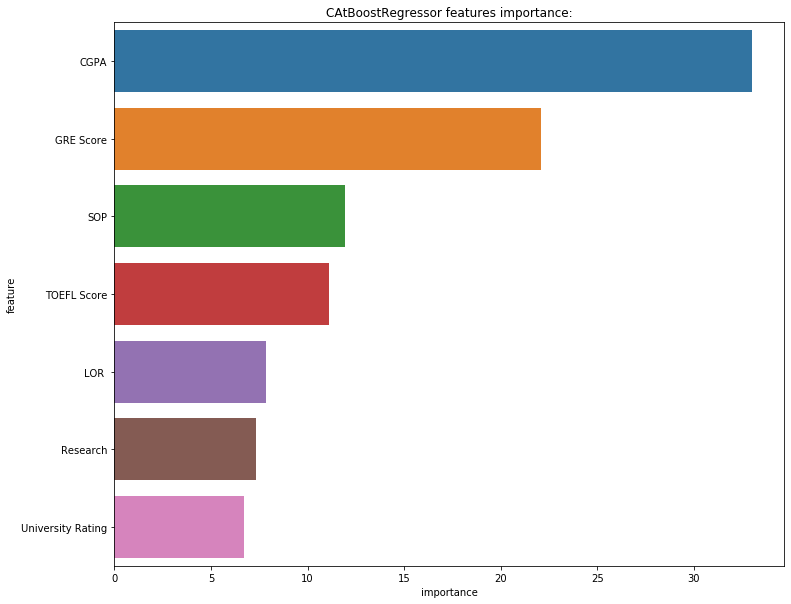

In [37]:
feature_importance_df = pd.DataFrame(cat.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(12, 10));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(9))
plt.title('CAtBoostRegressor features importance:');

In [23]:
rmse_cat = np.sqrt(mean_squared_error(y_test,cat_pred))

In [24]:
print("The RMSE for catboost regressor model is : ", rmse_cat)

The RMSE for catboost regressor model is :  0.06969507664704536


In [25]:
RMSES = [rmse_lr,rmse_tree, rmse_lgbm, rmse_xgb,rmse_rf,rmse_ridge, 
         rmse_ridge_hype_pred, rmse_lasso,rmse_lasso_hype_pred, rmse_cat]
RMSES.sort()

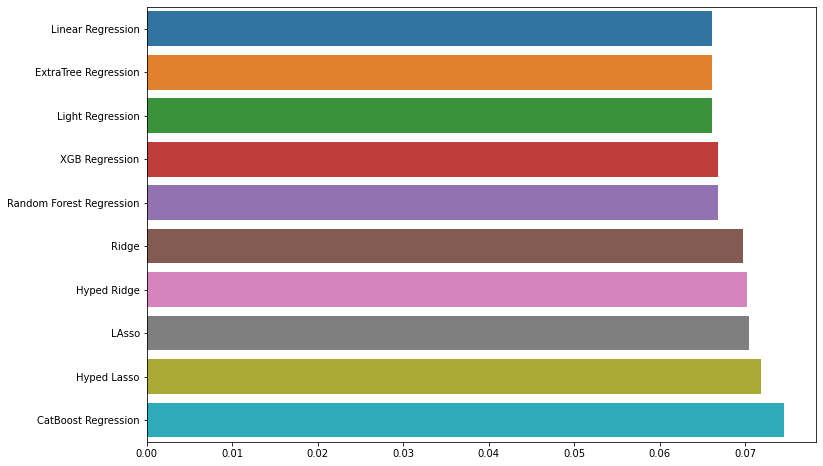

In [26]:
#ploting a barchart to show the rmse scores of each model  
y_axis=['Linear Regression' ,'ExtraTree Regression', 'Light Regression',
       'XGB Regression', 'Random Forest Regression', 
        'Ridge', 'Hyped Ridge', 'LAsso', 'Hyped Lasso', 'CatBoost Regression']

plt.figure(figsize = (12,8))
sns.barplot(x= RMSES, y=y_axis, linewidth=1.5)

### from this plot, we can see that Linear Regression has the lowest rmse score, therefore, we will be using the Linear model for predicting our last 100 observations.

In [27]:
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
400,304,100,2,3.5,3.0,8.22,0
401,315,105,2,3.0,3.0,8.34,0
402,324,109,3,3.5,3.0,8.94,1
403,330,116,4,4.0,3.5,9.23,1
404,311,101,3,2.0,2.5,7.64,1


In [28]:
val.head()

400    0.63
401    0.66
402    0.78
403    0.91
404    0.62
Name: Chance of Admit , dtype: float64

In [29]:
test_pred = lr.predict(test)

In [30]:
test_pred

array([0.61506475, 0.66510703, 0.78631253, 0.86562301, 0.5775521 ,
       0.52353767, 0.65571179, 0.60771874, 0.57570831, 0.56396779,
       0.53005606, 0.58201824, 0.61264972, 0.61753094, 0.73524353,
       0.79015612, 0.63294099, 0.5753336 , 0.64911174, 0.62354889,
       0.51659831, 0.81247541, 0.79822413, 0.94687961, 0.90485223,
       0.93873834, 0.7245362 , 0.73180422, 0.72993157, 0.88431595,
       0.65958377, 0.77034443, 0.84882674, 0.74962774, 0.63208328,
       0.59114603, 0.56503864, 0.6088275 , 0.72648593, 0.67209476,
       0.55522606, 0.76601813, 0.90750024, 0.85470851, 0.87555015,
       0.87273823, 0.93988078, 0.80917874, 0.76450285, 0.77404275,
       0.80555336, 0.86275808, 0.90529162, 0.75259725, 0.62428264,
       0.54651724, 0.54941853, 0.48936722, 0.6772982 , 0.87010991,
       0.76079539, 0.61015038, 0.61366398, 0.59888049, 0.47599563,
       0.64368247, 0.74134493, 0.77403463, 0.81633926, 0.84372004,
       0.8461064 , 0.64230681, 0.90382315, 0.64458873, 0.62529

In [31]:
test_rmse = np.sqrt(mean_squared_error(val,test_pred))

In [32]:
print("The rmse score on the last 100 observation is :",test_rmse)

The rmse score on the last 100 observation is : 0.04159957347787646
